Testing BeautifulSoup and Selenium on a dataset available online from Statista. It's a fairly simple dataset showing how the number of Facebook users increased over the period Q2 2018 - Q2 2021. 

Data is stripped from https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/

In [5]:
import os
cwd = os.getcwd()
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from selenium import webdriver

C:\Users\alijl


In [86]:
def datastripprocess(url,strlen):

    driver = webdriver.Chrome()
    driver.get(url)

    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")

    output = soup.findAll('table')[1].findAll('tr')
    
    listtuple = []
    for tag in output:
        data_tuple = (tag.text[:strlen],tag.text[strlen:])
        listtuple.append(data_tuple)
        
    listlist = [list(elem) for elem in listtuple]
    
    listlist = listlist[1:]
    return listlist

def spacestrip(spacelist,nospacelist):
    for x in spacelist:
        z = [y.strip(' ') for y in x]
        nospacelist.append(z)

def commastrip(commalist,nocommalist):
    for x in commalist:
        z = [y.replace(',',"") for y in x]
        nocommalist.append(z)

In [87]:
fbookmthlyusers= datastripprocess(url="https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/"
                                  ,strlen=7)

In [88]:
fbookmthlyuserscommasspaces = fbookmthlyusers

fbookmthlyuserscommas = []
spacestrip(spacelist = fbookmthlyuserscommasspaces,nospacelist=fbookmthlyuserscommas)

fbookmthlyusers = []
commastrip(commalist = fbookmthlyuserscommas,nocommalist=fbookmthlyusers)


In [89]:
print(fbookmthlyusers)

[['\n', 'Our services\n                    Click the question mark for further information\n                        Free\n                    \n                                                        $39 per month*\n                        \n                                (billed annually)\n'], ['\xa0Basic', 'statistics'], ['\xa0Premiu', 'm statistics'], ['', ''], ['\n', 'Graph download\n'], ['\n', 'Download PDF\n'], ['\n', 'Excel download\n'], ['\n', 'Register\n                        \n                            Purchase now\n']]


In [72]:
quarteryear = []
for item in fbookmthlyusers:
    x = item[0]
    quarteryear.append(x)

mthlyusers = []
for item in fbookmthlyusers:
    x = item[1]
    mthlyusers.append(x)

In [76]:
mthlyusers = [int(i) for i in mthlyusers]

["Q2 '18", "Q3 '18", "Q4 '18", "Q1 '19", "Q2 '19", "Q3 '19", "Q4 '19", "Q1 '20", "Q2 '20", "Q3 '20", "Q4 '20", "Q1 '21", "Q2 '21"]


In [80]:
quarteryear.reverse()
mthlyusers.reverse()
print(quarteryear)

["Q2 '18", "Q3 '18", "Q4 '18", "Q1 '19", "Q2 '19", "Q3 '19", "Q4 '19", "Q1 '20", "Q2 '20", "Q3 '20", "Q4 '20", "Q1 '21", "Q2 '21"]


In [81]:
print(mthlyusers)

[2234, 2271, 2320, 2375, 2414, 2449, 2498, 2603, 2701, 2740, 2797, 2853, 2895]


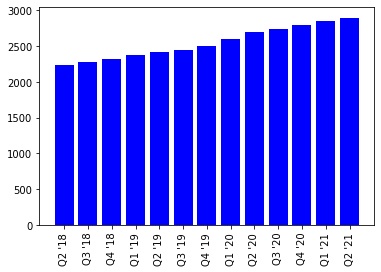

In [85]:
plt.bar(quarteryear, mthlyusers, color='blue')
plt.xticks(rotation=90)
plt.show()